In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline


## running the model

In [3]:
from Regard import init
args = init(verbose=1, epochs = 30)
print('Parameters=', args)

path = 'Regard.pt'

Parameters= {'batch_size': 8, 'test_batch_size': 400, 'epochs': 30, 'lr': 0.01, 'momentum': 0.25, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 50, 'verbose': 1, 'conv1_dim': 10, 'conv1_kernel_size': 5, 'conv2_dim': 20, 'conv2_kernel_size': 5, 'crop': 121, 'size': 128, 'mean': 0.3, 'std': 0.6}


In [4]:
from Regard import ML
ml = ML(args)

import os
import torch
ml.model.load_state_dict(torch.load(path))
print('Loading file', path)



cuda? False
cuda? False
Loading file Regard.pt


In [5]:
ml.d.dataset.classes, ml.d.classes

(['blink', 'center', 'left', 'right'], ['blink', 'center', 'left', 'right'])

    content_image = utils.load_image(args.content_image, scale=args.content_scale)

## testing the model

In [6]:
import imageio
image = imageio.imread('./dataset/right/2018-03-20_Nicolas_40.png')
image = (image-image.min())/(image.max()-image.min()) * 1.
image *= args.std
image += args.mean
print('size of input image', image.shape)

size of input image (243, 243, 3)


In [7]:
from PIL import Image
image = Image.open('./dataset/right/2018-03-20_Nicolas_40.png')
print('size of input image', image.height, image.width)

size of input image 243 243


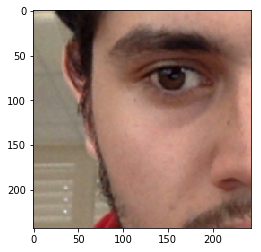

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#show the image
plt.imshow(image)
plt.show() 

In [9]:
from torchvision import transforms

#t = transforms.Normalize(mean=args.mean, std=args.std)
t = transforms.Compose([
    transforms.CenterCrop(args.crop),
    transforms.Resize(args.size),
    transforms.ToTensor(),
    #transforms.Normalize(mean=self.IMAGENET_MEAN, std=self.IMAGENET_STD),
    transforms.Normalize(mean=[args.mean]*3, std=[args.std]*3),
    ])


data = t(image)
data.unsqueeze_(0)

print('size of data image', data.shape)


size of data image torch.Size([1, 3, 128, 128])


In [10]:
output = ml.model(data)#.double())

In [11]:
output


tensor([[-18.7166,  -2.2435, -27.1633,  -0.1121]])

In [12]:
def classify(image, t):
    data = t(image)
    data.unsqueeze_(0)
    output = ml.model(data)#.double())
    #output = ml.model.forward(image)

    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    return pred

import time
t0 = time.time()
pred = classify(image, t)
print('Elapsed time =', (time.time()-t0)*1000, 'ms')
print('Prediction =', ml.d.dataset.classes[pred])

Elapsed time = 7.023811340332031 ms
Prediction = right


In [13]:
import numpy as np
data = torch.from_numpy(np.transpose(image, (2, 0, 1)))
#data = torch.from_numpy(image)
print('size of data image', data.shape)


size of data image torch.Size([3, 243, 243])


In [14]:
data = torch.randn((3, 243, 243))
print('size of data image', data.shape)



size of data image torch.Size([3, 243, 243])


In [15]:
#t = transforms.Normalize(mean=args.mean, std=args.std)
t = transforms.Compose([
    transforms.CenterCrop(args.crop),
    transforms.Resize(args.size),
    transforms.ToTensor(),
    #transforms.Normalize(mean=self.IMAGENET_MEAN, std=self.IMAGENET_STD),
    transforms.Normalize(mean=[args.mean]*3, std=[args.std]*3),
    ])

#data = t(data)
#print('size of data image', data.shape)


# dynamical test

/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml
Time 369600.525566365


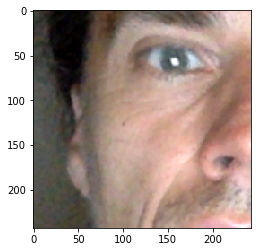

Prediction = right
Elapsed time = 377.655029296875 ms


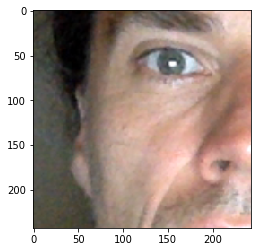

Prediction = right
Elapsed time = 416.08309745788574 ms


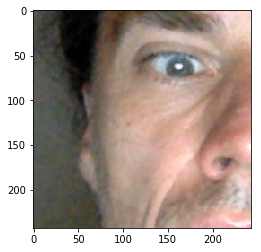

Prediction = right
Elapsed time = 418.18714141845703 ms


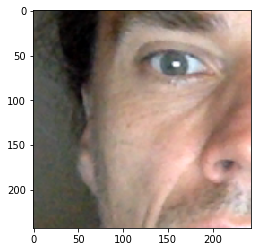

Prediction = right
Elapsed time = 391.711950302124 ms


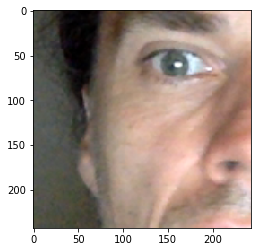

Prediction = right
Elapsed time = 357.8009605407715 ms


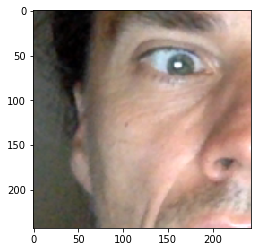

Prediction = right
Elapsed time = 387.2089385986328 ms


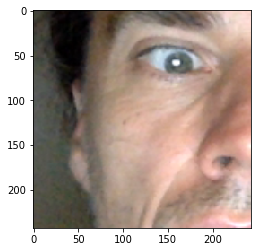

Prediction = right
Elapsed time = 333.0669403076172 ms


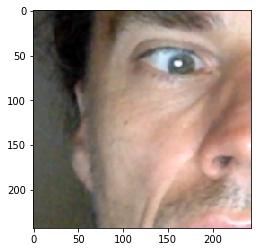

Prediction = right
Elapsed time = 350.7862091064453 ms


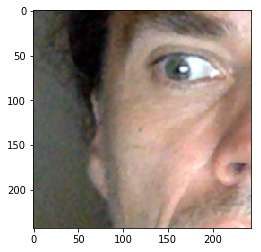

Prediction = center
Elapsed time = 403.6409854888916 ms


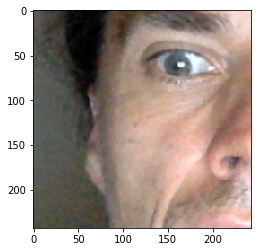

Prediction = center
Elapsed time = 334.9771499633789 ms


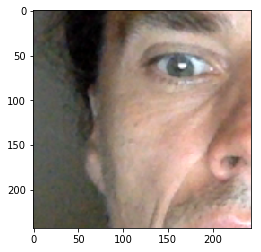

Prediction = center
Elapsed time = 367.72608757019043 ms


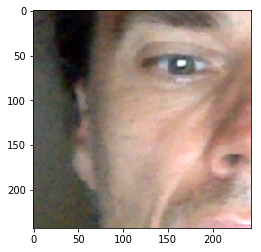

Prediction = right
Elapsed time = 383.14080238342285 ms


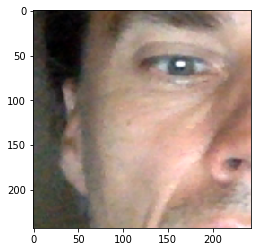

Prediction = right
Elapsed time = 348.8430976867676 ms


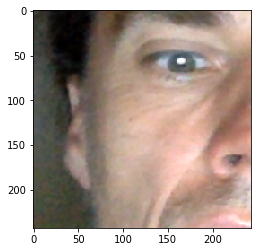

Prediction = right
Elapsed time = 393.491268157959 ms


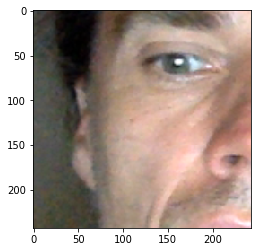

Prediction = right
Elapsed time = 328.4778594970703 ms


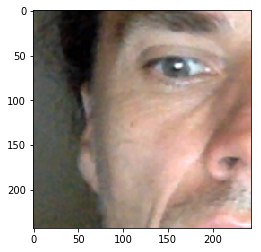

Prediction = right
Elapsed time = 344.72107887268066 ms


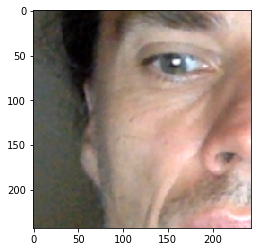

Prediction = right
Elapsed time = 378.5121440887451 ms


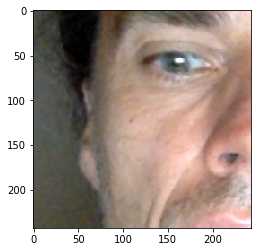

Prediction = right
Elapsed time = 358.4468364715576 ms


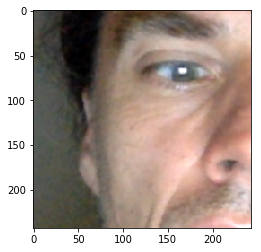

Prediction = right
Elapsed time = 338.29712867736816 ms


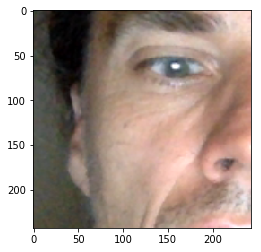

Prediction = right
Elapsed time = 344.09213066101074 ms


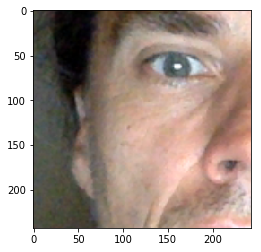

Prediction = right
Elapsed time = 338.1609916687012 ms


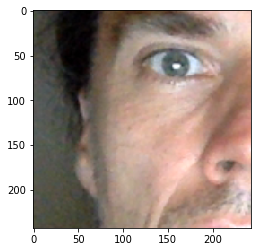

Prediction = right
Elapsed time = 399.7969627380371 ms


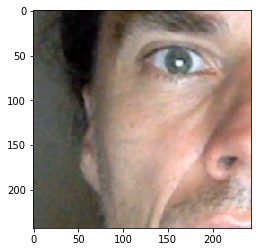

Prediction = right
Elapsed time = 339.79010581970215 ms


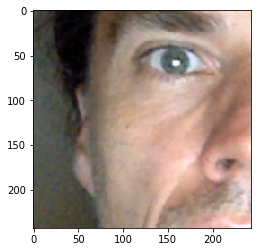

Prediction = right
Elapsed time = 336.5821838378906 ms


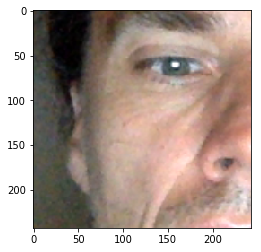

Prediction = right
Elapsed time = 336.56907081604004 ms


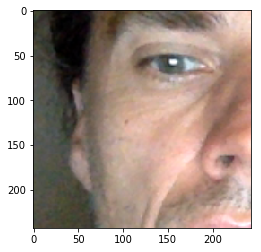

Prediction = right
Elapsed time = 331.5260410308838 ms


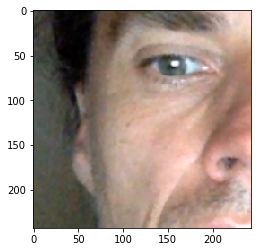

Prediction = right
Elapsed time = 383.0230236053467 ms


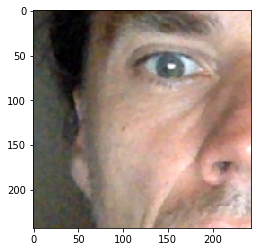

Prediction = right
Elapsed time = 366.32227897644043 ms


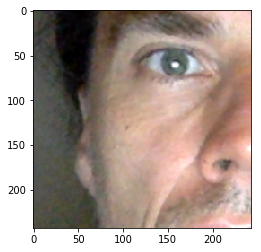

Prediction = right
Elapsed time = 340.2848243713379 ms


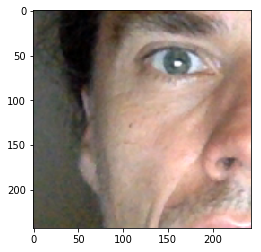

Prediction = right
Elapsed time = 400.75182914733887 ms


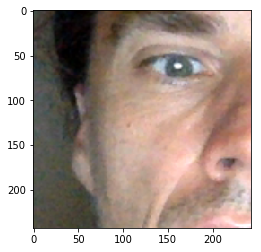

Prediction = right
Elapsed time = 329.26011085510254 ms


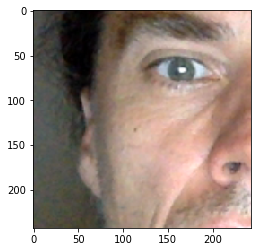

Prediction = right
Elapsed time = 330.3952217102051 ms


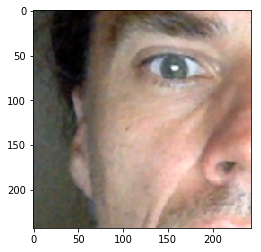

Prediction = right
Elapsed time = 338.5639190673828 ms


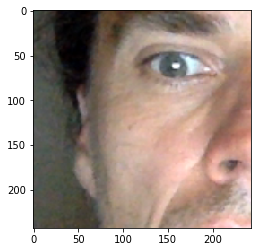

Prediction = right
Elapsed time = 334.52820777893066 ms


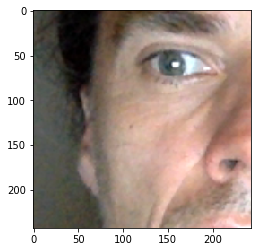

Prediction = right
Elapsed time = 336.73596382141113 ms


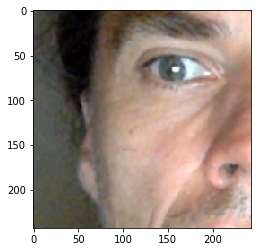

Prediction = right
Elapsed time = 364.5169734954834 ms


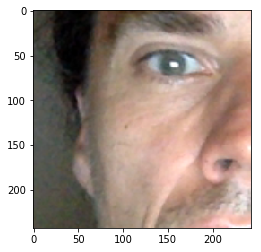

Prediction = right
Elapsed time = 384.17696952819824 ms


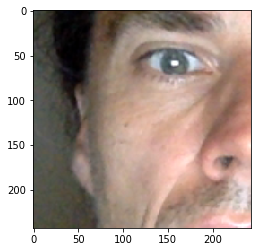

Prediction = right
Elapsed time = 345.9508419036865 ms


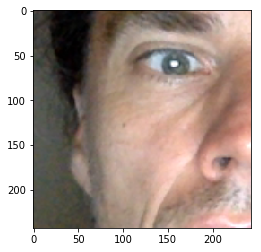

Prediction = right
Elapsed time = 401.5629291534424 ms


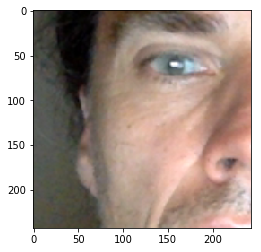

Prediction = right
Elapsed time = 346.315860748291 ms


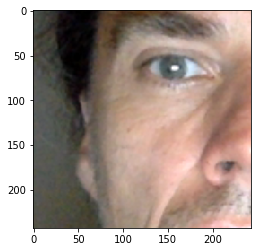

Prediction = right
Elapsed time = 405.7929515838623 ms


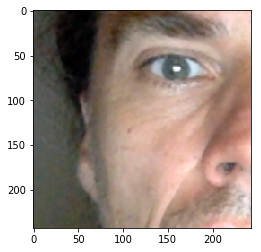

Prediction = right
Elapsed time = 340.38496017456055 ms


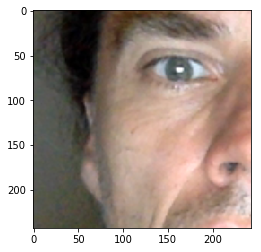

Prediction = center
Elapsed time = 381.97779655456543 ms


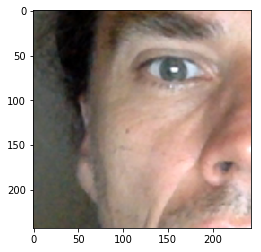

Prediction = right
Elapsed time = 425.02284049987793 ms


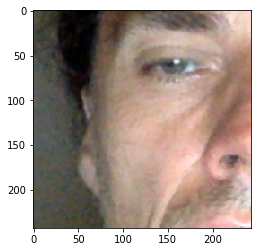

Prediction = right
Elapsed time = 370.16820907592773 ms


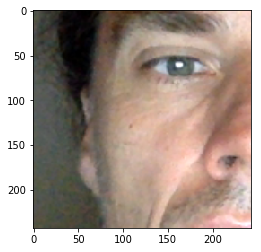

Prediction = right
Elapsed time = 426.6698360443115 ms


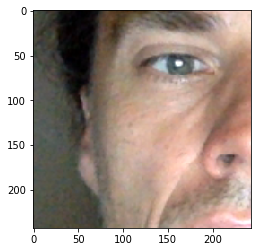

Prediction = right
Elapsed time = 381.0558319091797 ms


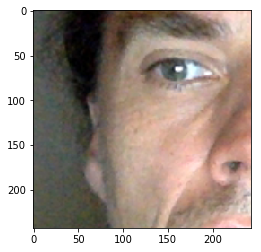

Prediction = center
Elapsed time = 377.2721290588379 ms


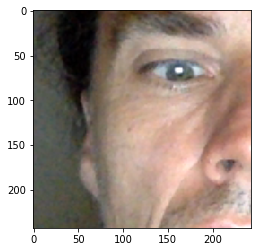

Prediction = right
Elapsed time = 387.998104095459 ms


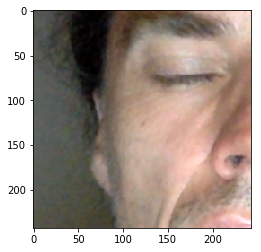

Prediction = center
Elapsed time = 401.06701850891113 ms


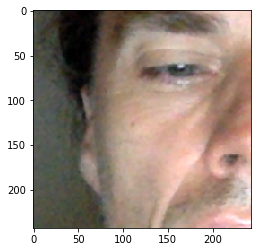

Prediction = right
Elapsed time = 332.5669765472412 ms


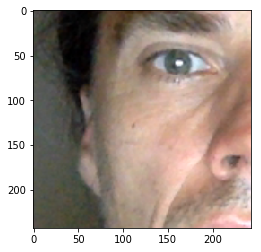

Prediction = right
Elapsed time = 332.9319953918457 ms


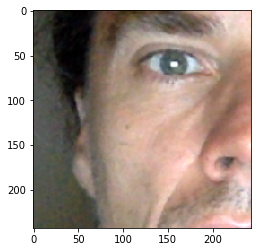

Prediction = right
Elapsed time = 339.4949436187744 ms


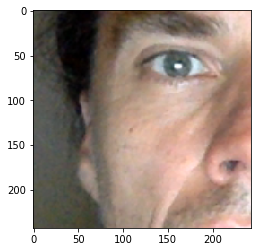

Prediction = right
Elapsed time = 335.41083335876465 ms


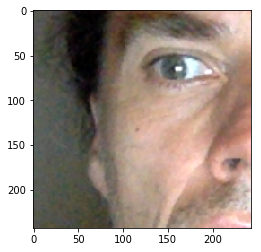

Prediction = center
Elapsed time = 347.21994400024414 ms


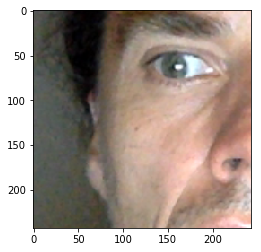

Prediction = center
Elapsed time = 389.0841007232666 ms


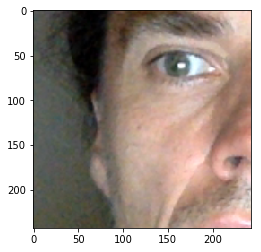

Prediction = center
Elapsed time = 350.98886489868164 ms


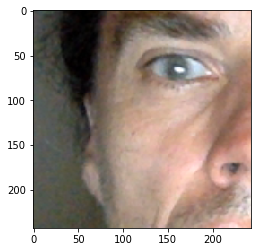

Prediction = center
Elapsed time = 342.7278995513916 ms


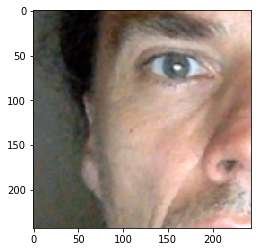

Prediction = right
Elapsed time = 441.22910499572754 ms


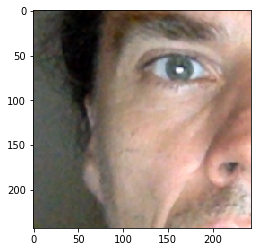

Prediction = center
Elapsed time = 372.27606773376465 ms


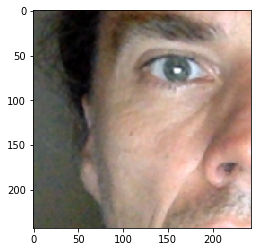

Prediction = right
Elapsed time = 336.79795265197754 ms


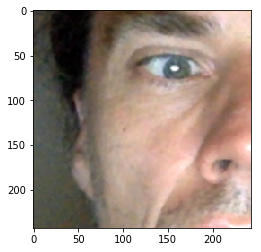

Prediction = right
Elapsed time = 318.9830780029297 ms


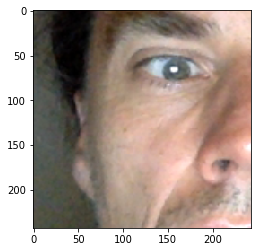

Prediction = right
Elapsed time = 345.0741767883301 ms


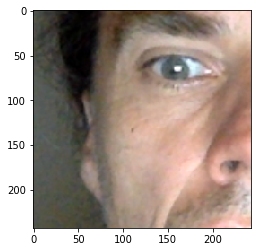

Prediction = right
Elapsed time = 332.5357437133789 ms
Capture released


In [16]:

from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

def classify(image, t):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    data = t(image)
    data.unsqueeze_(0)
    output = ml.model(data)#.double())
    #output = ml.model.forward(image)

    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
    return pred



def dyn_test(N_frame=64, startup_time=1., interframe_time=0., waiting_time=.0):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())

        H, W, three = img_face.shape
        for i in range(N_frame):            
            t0 = time.time()

            # presentation of stimulus
            time.sleep(interframe_time)

            frame = et.cam.grab()
            img_face, res, t0_ = et.process_frame(frame, et.clock())
            img_face = img_face[:, :, ::-1]

            pred = classify(img_face, t)
            plt.imshow(img_face)
            plt.show() 
            print('Prediction =', ml.d.dataset.classes[pred])
            time.sleep(waiting_time)
            print('Elapsed time =', (time.time()-t0)*1000, 'ms')

    finally:
        et.close()
        
dyn_test()        